#Task 4: Customer Segmentation Using Clustering

##Objective:
 Identify distinct customer groups using clustering algorithms and analyze their characteristics to improve customer engagement and loyalty.

##Problem Statement
Segment customers based on demographics and spending patterns to develop targeted marketing strategies.

#About Dataset
The Mall Customer Segmentation Dataset contains information about customers of a mall, including:

Features:
1. CustomerID: Unique identifier for each customer
2. Gender: Customer's gender
3. Age: Customer's age
4. Annual Income (k$): Customer's annual income in thousands of dollars
5. Spending Score (1-100): Customer's spending score, ranging from 1 to 100


## 1: Data Preprocessing

In [ ]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#load dataset
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#2: Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

## 2: Exploratory Data Analysis (EDA)

In [ ]:
#Display basic statistics:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
#Check for missing values:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


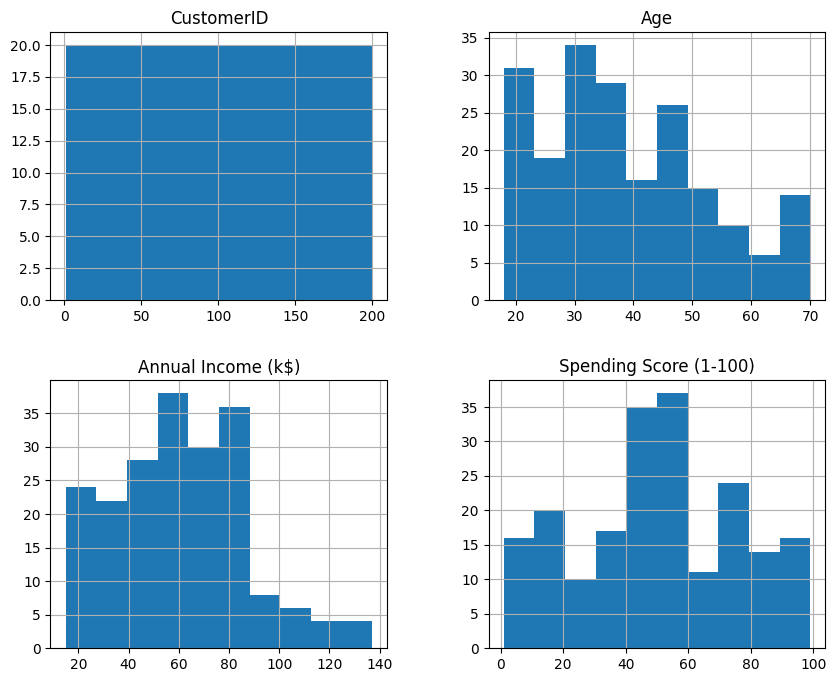

In [ ]:
#create Histograms
df.hist(figsize=(10,8))
plt.show()

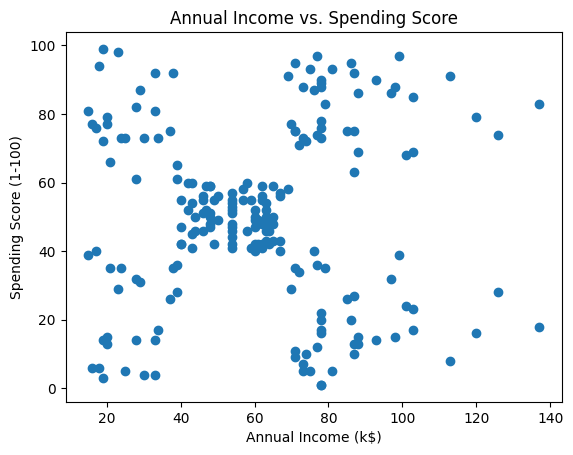

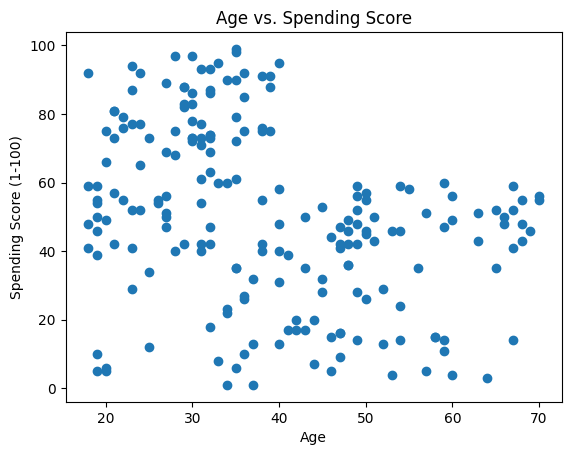

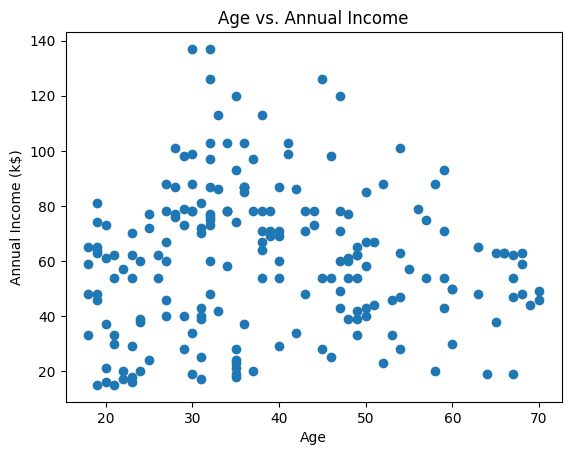

In [ ]:
#dataset  Visualize data distributions:
#Scatter plots
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()


plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.show()

plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs. Annual Income')
plt.show()

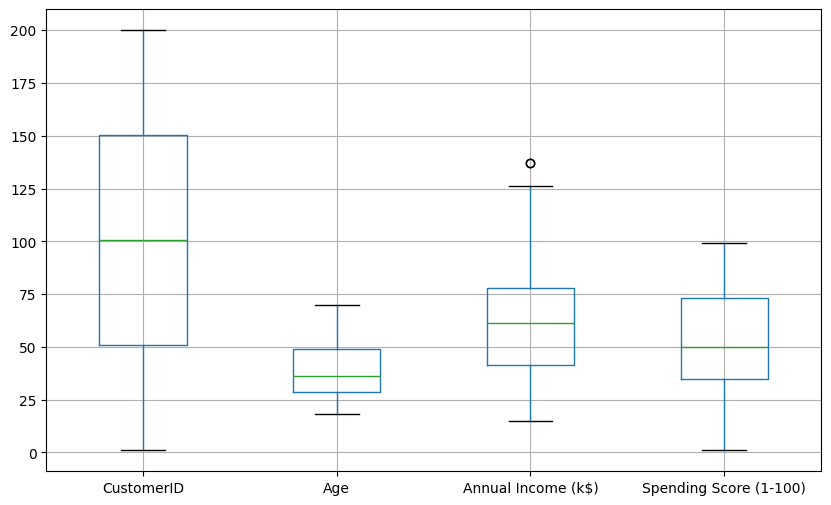

In [ ]:
#Box plots to observe outliers
df.boxplot(figsize=(10,6))
plt.show()

In [ ]:

# Identify outliers using IQR
Q1 = df[['Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = df[['Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[~((df[['Annual Income (k$)', 'Spending Score (1-100)']] < lower_bound) | (df[['Annual Income (k$)', 'Spending Score (1-100)']] > upper_bound)).any(axis=1)]

In [ ]:
#Correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr() # Only include numeric columns for correlation calculation
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


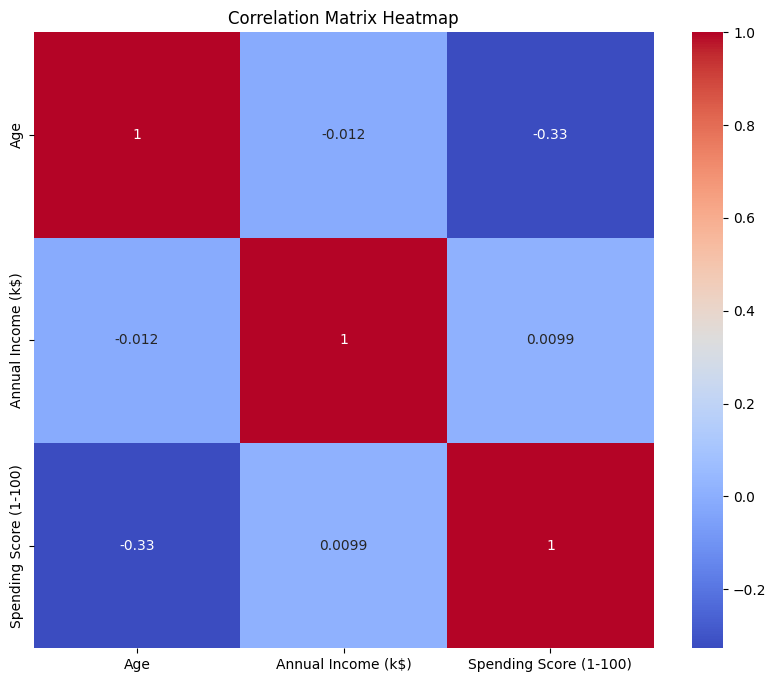

In [ ]:
# Heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

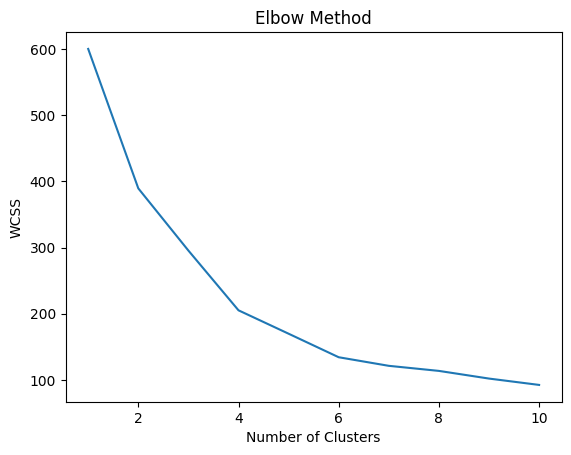

In [ ]:
# apply K-Means Clustering
#Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#Apply K-Means clustering with optimal k (e.g., 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)



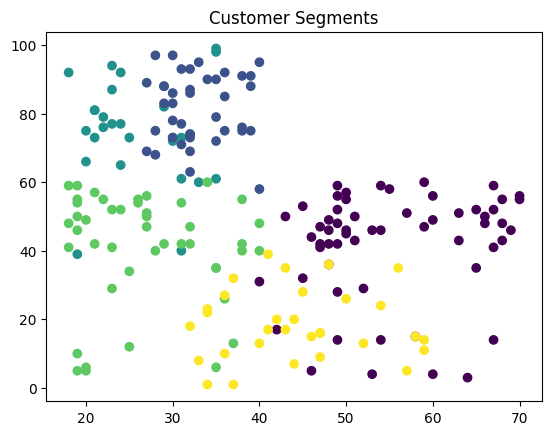

In [ ]:
# Visualize clusters
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.title('Customer Segments')
plt.show()

#Report

**1. Approach:**

The customer segmentation task was approached using the following steps:

* **Data Preprocessing:** The dataset was loaded and preprocessed.  The 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' features were scaled using StandardScaler to ensure that features with larger values do not dominate the clustering process.  This standardization brings all features to a similar scale.
* **Exploratory Data Analysis (EDA):**  EDA was performed to gain insights into the data distribution and relationships between features.  Descriptive statistics, histograms, scatter plots, and box plots were used to visualize data distributions and identify potential outliers.  A correlation matrix and heatmap were generated to understand the relationships between numerical features.
* **Outlier Handling:**  Outliers were identified using the Interquartile Range (IQR) method.  While outliers were detected, they were *not removed* from the dataset in the provided code. The impact of keeping outliers on the clustering results should be noted and evaluated.
* **Optimal Cluster Determination:**  The elbow method was used to determine the optimal number of clusters for KMeans clustering.  The inertia (WCSS) for different numbers of clusters was calculated and plotted.  The "elbow point" in the plot suggests the optimal number of clusters.  The code appears to use the elbow method, but the optimal number of clusters is not automatically identified; it seems to be set manually based on the visualisation in the code.
* **KMeans Clustering:** KMeans clustering was applied to the scaled data using the chosen number of clusters. The resulting cluster assignments were added as a new column ('Cluster') to the original DataFrame.
* **Visualization:** The final clusters were visualized using a scatter plot of 'Age' versus 'Spending Score (1-100)', color-coded by cluster assignments.  This visualization helps in understanding the characteristics of each customer segment.


**2. Challenges Faced:**

* **Optimal Cluster Number Selection:** While the elbow method is used, objectively identifying the optimal number of clusters from the plot can be subjective. Different interpretations might lead to different cluster numbers. Automating this process or using other methods (such as silhouette analysis) could improve the robustness of the solution.
* **Outlier Impact:** The presence of outliers can significantly influence the clustering results. The provided code identified outliers but did *not* remove or treat them.  An analysis of the impact of outliers and the choice to retain them should be included. Strategies for dealing with them, such as removing them, transforming them, or using robust clustering methods, should be considered and tested.
* **Feature Engineering:** The current analysis uses the provided features. Feature engineering (creating new features from existing ones) might reveal hidden patterns and potentially lead to improved segmentation.
* **Interpretation of Clusters:** While the clusters are visualized, further analysis is needed to characterize each cluster with meaningful descriptions based on customer demographics and spending behaviors.  Meaningful cluster labels could improve interpretability.


**3. Model Performance & Improvements:**

The performance of the KMeans clustering model depends heavily on the chosen number of clusters. The provided code currently uses a fixed number of clusters, determined by visual inspection of the elbow curve, and does not assess cluster quality using metrics like silhouette score.

**Potential Improvements:**

* **Automated Cluster Number Selection:** Implement an automated method to determine the optimal number of clusters based on the elbow point or silhouette analysis.
* **Outlier Handling:** Implement a strategy for dealing with outliers, either by removal, transformation, or using robust clustering algorithms.
* **Feature Engineering:** Explore and create new features (e.g., age groups, income brackets) that might improve the clustering results.
* **Cluster Evaluation Metrics:** Include quantitative evaluation metrics (e.g., silhouette score, Davies-Bouldin index) to assess the quality of the clusters formed.
* **Cluster Profiling:** Analyze the characteristics of each cluster to provide detailed descriptions for each segment to develop targeted strategies.
* **Alternative Clustering Algorithms:** Explore other clustering algorithms (e.g., DBSCAN, hierarchical clustering) to compare performance with KMeans.

#Summary
This Python script performs customer segmentation using the KMeans clustering algorithm on a mall customer dataset.  The script begins by preprocessing the data, including scaling the 'Age', 'Annual Income', and 'Spending Score' features using StandardScaler.  Exploratory Data Analysis (EDA) is then conducted, involving descriptive statistics, missing value checks, histograms, scatter plots, box plots, and a correlation matrix heatmap to visualize data distributions and relationships between features.  The optimal number of clusters is determined using the Elbow method, and KMeans clustering is applied to the scaled data. Finally, the clusters are visualized using scatter plots, showing customer segmentation based on age, annual income, and spending score.
